In [1]:
import pandas as pd
url =  "https://assets.datacamp.com/production/repositories/5809/datasets/7e62911f924c0942b94af5858eff92d81550c77f/lasvegas_tripadvisor.csv"
reviews = pd.read_csv(url)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
reviews["Score"].value_counts()

5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

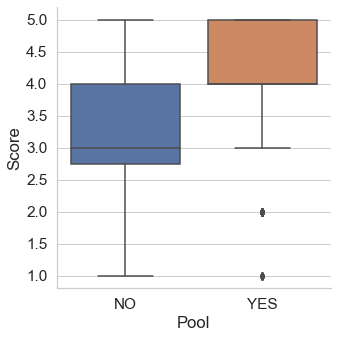

In [5]:
#setting font size and plot background
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

sns.catplot(
    x="Pool",
    y="Score",
    data=reviews,
    kind="box"
);

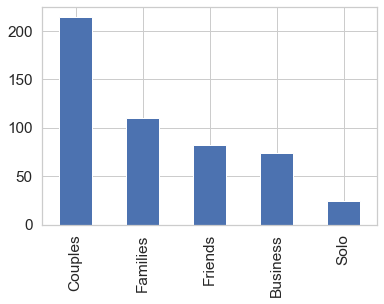

In [6]:
reviews["Traveler type"].value_counts().plot.bar();

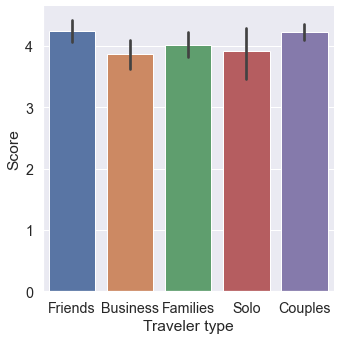

In [7]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
sns.catplot(
    x="Traveler type",
    y="Score",
    data=reviews,
    kind="bar");

In [8]:
#ordering the categories
reviews["Traveler type"] = reviews["Traveler type"].astype('category')
reviews["Traveler type"].cat.categories

Index(['Business', 'Couples', 'Families', 'Friends', 'Solo'], dtype='object')

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   User country       504 non-null    object  
 1   Nr. reviews        504 non-null    int64   
 2   Nr. hotel reviews  504 non-null    int64   
 3   Helpful votes      504 non-null    int64   
 4   Score              504 non-null    int64   
 5   Period of stay     504 non-null    object  
 6   Traveler type      504 non-null    category
 7   Pool               504 non-null    object  
 8   Gym                504 non-null    object  
 9   Tennis court       504 non-null    object  
 10  Spa                504 non-null    object  
 11  Casino             504 non-null    object  
 12  Free internet      504 non-null    object  
 13  Hotel name         504 non-null    object  
 14  Hotel stars        504 non-null    int64   
 15  Nr. rooms          504 non-null    int64   
 16  User con

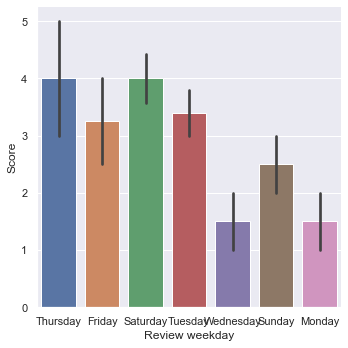

In [33]:
sns.set(font_scale=1.0)
sns.set_style("darkgrid")
sns.catplot(
    x="Review weekday",
    y="Score",
    data=reviews[reviews["Pool"]=="NO"],
    kind="bar");

In [31]:
b

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
5,Canada,31,8,27,3,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,March,Tuesday
6,UK,45,12,46,4,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,4,April,Friday
7,USA,2,1,4,4,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,0,April,Tuesday
8,India,24,3,8,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Asia,3,May,Saturday
9,Canada,12,7,11,3,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,5,May,Tuesday
